In [1]:
import numpy as np
import pandas as pd  
import xarray as xr 
import matplotlib.pyplot as plt 

In [2]:
# Fn1 = '/global/homes/l/linyaoly/ERA5/script/Unet4MJO/19maps_MCDO_ERA5_filtered/output/predicted_MCDO_UNET_19maps15deg_ROMIERA5_lead30_dailyinput_1979to1980_nmem30_d20.nc'
# Fn1 = '/global/homes/l/linyaoly/ERA5/script/Unet4MJO/19maps_MCDO_ERA5_filtered/output/predicted_MCDO_UNET_19maps15deg_ROMIERA5_lead30_dailyinput_1979to1980_nmem1_d1.nc'
# Fn1 = '/global/homes/l/linyaoly/ERA5/script/Unet4MJO/19maps_MCDO_ERA5_filtered/output/predicted_MCDO_UNET_19maps20deg_RMMERA5_lead15_dailyinput_1979to1980_nmem1_d1.nc'
Fn1 = '/global/homes/l/linyaoly/ERA5/script/Unet4MJO/19maps_MCDO_ERA5_filtered/output/predicted_MCDO_UNET_19maps20deg_RMMERA5_lead15_dailyinput_1979to1980_nmem1_d1.nc'
rmm = xr.open_dataset(Fn1)['RMMp']

In [3]:
rmm

<xarray.DataArray 'RMMp' (time: 365, mode: 2)>
array([[nan, nan],
       [nan, nan],
       [nan, nan],
       ...,
       [nan, nan],
       [nan, nan],
       [nan, nan]])
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-12-31
  * mode     (mode) int64 0 1
Attributes:
    description:  RMM prediction

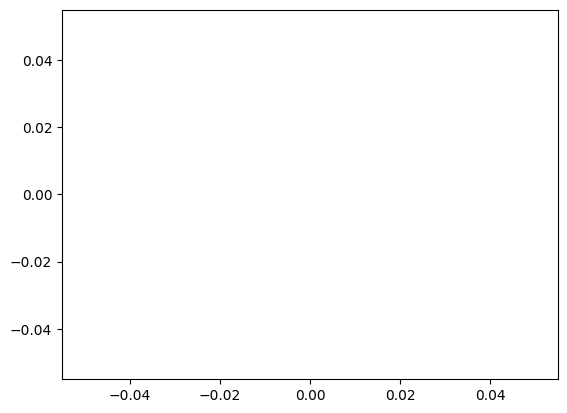

In [4]:
plt.plot(rmm[:300,1])

In [2]:
import sys
import numpy as np
import pandas as pd  
import xarray as xr 

datadir = '/pscratch/sd/l/linyaoly/ERA5/reanalysis/'
Fn1 = datadir+'ERA5.u200GfltG.day.1979to2022.nc'
Fn2 = datadir+'ERA5.u850GfltG.day.1979to2022.nc'
Fn3 = datadir+'ERA5.olrGfltG.day.1979to2022.nc'

Fn4 = datadir+'ERA5.tcwvGfltG.day.1979to2022.nc'
Fn5 = datadir+'ERA5.v200GfltG.day.1979to2022.nc'
Fn6 = datadir+'ERA5.T200GfltG.day.1979to2022.nc'
Fn7 = datadir+'ERA5.prepGfltG.day.1979to2022.nc'

Fn8 = datadir+'ERA5.u500GfltG.day.1979to2022.nc'
Fn9 = datadir+'ERA5.v500GfltG.day.1979to2022.nc'
Fn10 = datadir+'ERA5.v850GfltG.day.1979to2022.nc'
Fn11 = datadir+'ERA5.Z200GfltG.day.1979to2022.nc'
Fn12 = datadir+'ERA5.Z500GfltG.day.1979to2022.nc'
Fn13 = datadir+'ERA5.Z850GfltG.day.1979to2022.nc'
Fn14 = datadir+'ERA5.T500GfltG.day.1979to2022.nc'
Fn15 = datadir+'ERA5.T850GfltG.day.1979to2022.nc'
Fn16 = datadir+'ERA5.q200GfltG.day.1979to2022.nc'
Fn17 = datadir+'ERA5.q500GfltG.day.1979to2022.nc'
Fn18 = datadir+'ERA5.q850GfltG.day.1979to2022.nc'

# always be careful to let sst as the last input variable
Fn19 = datadir+'ERA5.sstGfltGmask0.day.1979to2022.nc'
Fn = [Fn1,Fn2,Fn3,Fn4,Fn5,Fn6,Fn7,Fn8,Fn9,Fn10,Fn11,Fn12,Fn13,Fn14,Fn15,Fn16,Fn17,Fn18,Fn19]
# variable name list
vn = ['u200','u850','olr','tcwv','v200','T200','prep','u500','v500','v850','Z200','Z500','Z850','T500','T850','q200','q500','q850','sst']
Fnmjo = '/global/homes/l/linyaoly/ERA5/reanalysis/RMM_ERA5_daily.nc'

nmem = 1  # memory length
ndays = 365   # how many samples in one 'year'  


leadmjo=1
mem_list= [0]
yn=2015
lat_lim=20

psi = []  

# open each dataset and select 365 samples
for ivn, varname in zip(np.arange(len(vn)),vn):
    # read the #ivn variable in the variable list
    FF0 = xr.open_dataset(Fn[ivn])  
    # slice the data in the given year and given latitude range
    FF0 = FF0.sel(time=slice(str(yn)+'-01-01', str(yn+1)+'-03-01'), lat=slice(lat_lim,-lat_lim))
    # fill the Nan
    FF0.fillna(0)
    # read the #ivn variable
    psi0 = np.asarray(FF0[vn[ivn]])

    del FF0

    # add memories from the first day of the year
    psi00 = np.zeros((ndays,nmem,np.size(psi0,1),np.size(psi0,2)))
    for i,memstp in zip(np.arange(nmem),mem_list):
        tmp = psi0[0+memstp:ndays+memstp,:,:]
        psi00[:,i,None,:,:] = np.reshape(tmp,(np.size(tmp,0),1,np.size(tmp,1),np.size(tmp,2))) 

    psi.append(psi00)
    del psi0
    del psi00


In [5]:
np.shape(psi)

(19, 365, 1, 21, 180)

In [6]:
FF0 = xr.open_dataset(Fn[ivn])  
# slice the data in the given year and given latitude range
FF0 = FF0.sel(time=slice(str(yn)+'-01-01', str(yn+1)+'-03-01'), lat=slice(lat_lim,-lat_lim))
# fill the Nan
FF0.fillna(0)
# read the #ivn variable
psi0 = FF0[vn[ivn]]
psi0

<xarray.DataArray 'sst' (time: 426, lat: 21, lon: 180)>
[1610280 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2016-03-01
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 20.0 18.0 16.0 14.0 12.0 ... -14.0 -16.0 -18.0 -20.0